In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import shape
import scipy.stats 
import seaborn as sns
import numpy as np
from scipy.stats.distributions import gamma
from sklearn.ensemble import RandomForestRegressor


pd.set_option('display.max_columns', None)

In [10]:
df = pd.read_csv('data/FW_Veg_Rem_Combined.csv')
df = df.iloc[:, 2:]

In [11]:
cont_columns_prefix = ['Prec_pre_', "Temp_pre_", "Wind_pre_", "Hum_pre_"]
columns_suffix = [7, 15, 30]

weather_columns = [ x + str(y) for x in cont_columns_prefix for y in columns_suffix]

In [22]:
df['putout_time'] = pd.to_timedelta(df['putout_time'])
df['putout_days'] = df['putout_time'].map(lambda x: x.days)

In [13]:
def preprocess_missing_weather_data(df):
    df_subsample = df[df['Temp_pre_7'] == -1]
    df_clean = df[df['Temp_pre_7'] != -1]
    mean_weather_data = df_clean.groupby(['state', 'disc_month_num'])[weather_columns].mean().reset_index()
    df_subsample.drop(weather_columns, axis=1, inplace=True)
    df_subsample = df_subsample.merge(mean_weather_data)
    df_clean = df_clean.append(df_subsample, ignore_index=True)
    return df_clean

In [26]:
df = preprocess_missing_weather_data(df)

/Users/ipavelyev/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [33]:
vegitation_mapping = {
    1: "Tropical Evergreen Broadleaf Forest",
    2: "Tropical Deciduous Broadleaf Forest",
    3: "Temperate Evergreen Broadleaf Forest",
    4: "Temperate Evergreen Needleleaf Forest TmpENF",
    9: "C3 Grassland/Steppe",
    12: "Open Shrubland",
    14: "Desert",
    15: "Polar Desert/Rock/Ice",
    16: "Secondary Tropical Evergreen Broadleaf Forest",
}


In [35]:
# For this lab you need subsample with 5-10 random variables, at least half of
# them should be described with continuous random variable type. Target variable
# should be continuous.

#columns for analysiss
target = "fire_size"
columns = ['state', 'stat_cause_descr',
            'disc_pre_year', 'disc_pre_month',
            'Wind_pre_7', 'Hum_pre_7',
            'Temp_pre_7', 'Prec_pre_7',
            'Vegetation', target]

df['disc_month_num'] = df['disc_clean_date'].map(lambda x: str(x).split('/')[0]).astype(int)

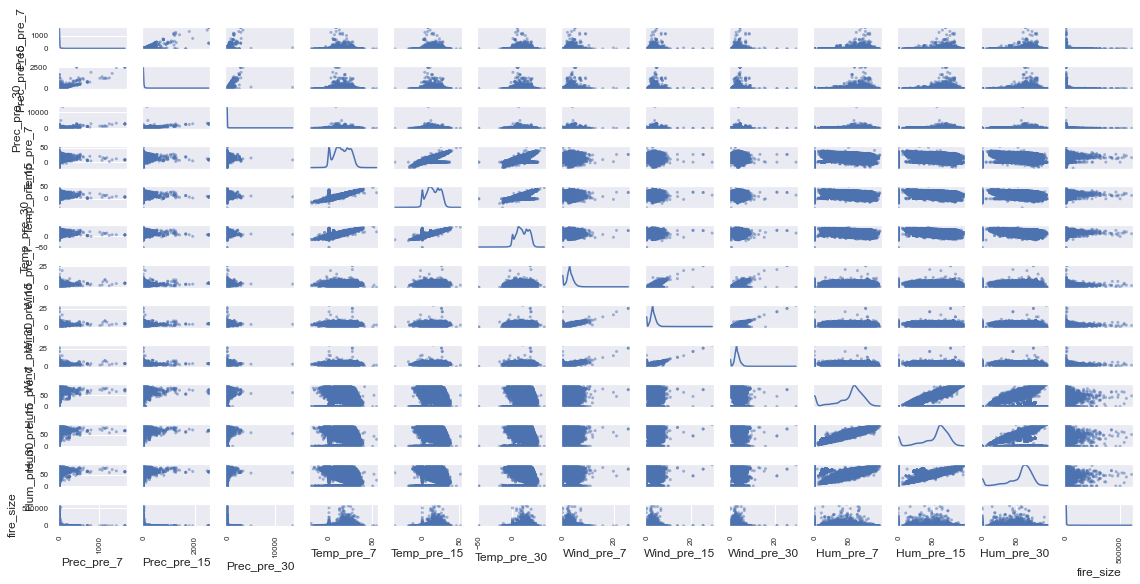

In [166]:
pd.plotting.scatter_matrix(df.loc[:, weather_columns + ['fire_size']], diagonal="kde")
plt.tight_layout()
plt.show()

In [37]:
# 1. Plotting a non-parametric estimation of PDF in form of a histogram and kernel
# density function for MRV (or probability law in case of discrete MRV).

In [ ]:
# 2. Estimation of multivariate mathematical expectation and variance.

In [47]:
df[weather_columns].describe()

,Prec_pre_7,Prec_pre_15,Prec_pre_30,Temp_pre_7,Temp_pre_15,Temp_pre_30,Wind_pre_7,Wind_pre_15,Wind_pre_30,Hum_pre_7,Hum_pre_15,Hum_pre_30
count,55360.000000,55360.000000,55360.000000,55360.000000,55360.000000,55360.000000,55360.000000,55360.000000,55360.000000,55360.000000,55360.000000,55360.000000
mean,6.776598,16.362748,36.399739,14.909938,14.771988,14.641182,2.740650,2.809727,2.920484,50.671468,52.627233,55.808301
std,31.194315,56.877499,111.792289,9.014628,8.847824,8.699849,1.435827,1.364218,1.263827,22.285205,21.451432,19.703704
min,0.000000,0.000000,0.000000,-20.846104,-37.000000,-49.210526,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,8.251759,8.190710,8.108350,2.024219,2.121665,2.258290,42.293532,45.504921,51.095773
50%,0.000000,2.445000,11.500000,15.026896,14.624446,14.106935,2.724270,2.788073,2.846926,57.348190,59.130480,61.442409
75%,6.055602,18.600000,45.000000,22.374450,22.100023,21.957285,3.576549,3.605838,3.616066,65.407268,66.545814,67.947899
max,1638.000000,2527.000000,13560.800000,55.000000,51.567797,46.600000,25.700000,29.800000,29.800000,96.000000,94.000000,96.000000


In [45]:
df[weather_columns].apply(np.mean)

Prec_pre_7      6.776598
Prec_pre_15    16.362748
Prec_pre_30    36.399739
Temp_pre_7     14.909938
Temp_pre_15    14.771988
Temp_pre_30    14.641182
Wind_pre_7      2.740650
Wind_pre_15     2.809727
Wind_pre_30     2.920484
Hum_pre_7      50.671468
Hum_pre_15     52.627233
Hum_pre_30     55.808301
dtype: float64

In [46]:
df[weather_columns].apply(np.std)

Prec_pre_7      31.194034
Prec_pre_15     56.876986
Prec_pre_30    111.791279
Temp_pre_7       9.014546
Temp_pre_15      8.847744
Temp_pre_30      8.699771
Wind_pre_7       1.435814
Wind_pre_15      1.364205
Wind_pre_30      1.263816
Hum_pre_7       22.285004
Hum_pre_15      21.451238
Hum_pre_30      19.703527
dtype: float64

In [43]:
sns.set(rc={'figure.figsize':(16, 8)})

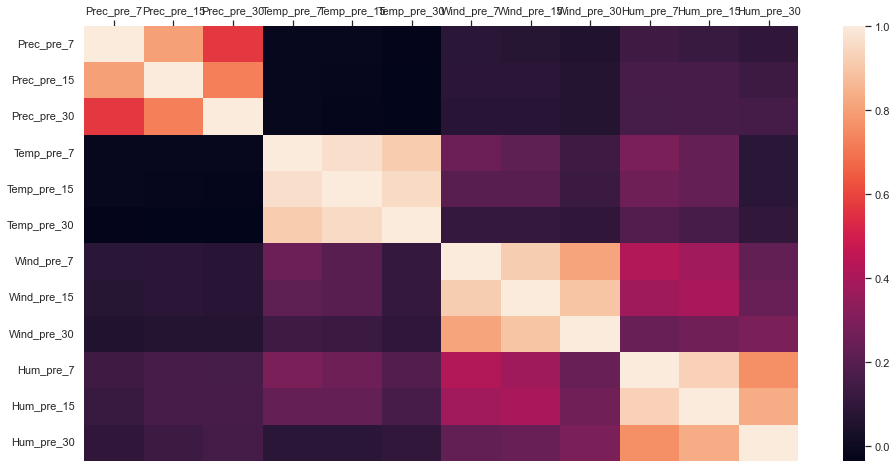

In [44]:
corrmat = df[weather_columns].corr()

sns.heatmap(corrmat, vmax=1., square=False).xaxis.tick_top()

In [ ]:
# 3. Non-parametric estimation of conditional distributions, mathematical
# expectations and variances. 

In [ ]:
corr = stats.pearsonr(X.V2, X.V3)
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])

In [ ]:
def calcWithinGroupsCovariance(variable1, variable2, groupvariable):
    levels = sorted(set(groupvariable))
    numlevels = len(levels)
    Covw = 0.0
    # get the covariance of variable 1 and variable 2 for each group:
    for leveli in levels:
        levelidata1 = variable1[groupvariable==leveli]
        levelidata2 = variable2[groupvariable==leveli]
        mean1 = np.mean(levelidata1)
        mean2 = np.mean(levelidata2)
        levelilength = len(levelidata1)
        # get the covariance for this group:
        term1 = 0.0
        for levelidata1j, levelidata2j in zip(levelidata1, levelidata2):
            term1 += (levelidata1j - mean1)*(levelidata2j - mean2)
        Cov_groupi = term1 # covariance for this group
        Covw += Cov_groupi
    totallength = len(variable1)
    Covw /= totallength - numlevels
    return Covw

In [ ]:
def calcBetweenGroupsCovariance(variable1, variable2, groupvariable):
    # find out how many values the group variable can take
    levels = sorted(set(groupvariable))
    numlevels = len(levels)
    # calculate the grand means
    variable1mean = np.mean(variable1)
    variable2mean = np.mean(variable2)
    # calculate the between-groups covariance
    Covb = 0.0
    for leveli in levels:
        levelidata1 = variable1[groupvariable==leveli]
        levelidata2 = variable2[groupvariable==leveli]
        mean1 = np.mean(levelidata1)
        mean2 = np.mean(levelidata2)
        levelilength = len(levelidata1)
        term1 = (mean1 - variable1mean) * (mean2 - variable2mean) * levelilength
        Covb += term1
    Covb /= numlevels - 1
    return Covb

In [ ]:
# 4. Estimation of pair correlation coefficients, confidence intervals for them and
# significance levels.

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LassoLarsIC

In [ ]:
#TODO
# 5. Task formulation for regression, multivariate correlation.
# 6. Regression model,multicollinearity and regularization (if needed). 

In [128]:
df.head()

,fire_name,fire_size,fire_size_class,stat_cause_descr,latitude,longitude,state,disc_clean_date,cont_clean_date,discovery_month,disc_date_final,cont_date_final,putout_time,disc_date_pre,disc_pre_year,disc_pre_month,wstation_usaf,dstation_m,wstation_wban,wstation_byear,wstation_eyear,Vegetation,fire_mag,weather_file,Temp_pre_30,Temp_pre_15,Temp_pre_7,Temp_cont,Wind_pre_30,Wind_pre_15,Wind_pre_7,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness,disc_month_num,putout_days,AK,AL,AR,AZ,CA,CO,CT,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,PR,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,0,4,9,12,14,15,16
0,NaN,10.0,C,Missing/Undefined,18.105072,-66.753044,PR,2/11/2007,NaN,Feb,NaN,NaN,NaT,1/12/2007,2007,Jan,785140,58917.69716,11603,1945,2018,12,1.0,785140-11603-2007.gz,24.480974,24.716923,24.902597,24.527961,4.341807,3.492857,3.262092,3.250413,78.216590,76.793750,76.381579,78.724370,0.0,0.0,0.0,0.0,0.017923,2,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,NaN,3.0,B,Arson,35.038330,-87.610000,TN,12/11/2006,NaN,Dec,NaN,NaN,NaT,11/11/2006,2006,Nov,723235,32665.34327,13896,1978,2020,15,0.1,723235-13896-2006.gz,7.553433,7.010000,0.343529,10.448298,2.709764,2.881707,1.976471,2.122320,70.840000,65.858911,55.505882,81.682678,59.8,8.4,0.0,86.8,0.184355,12,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,NaN,60.0,C,Arson,34.947800,-88.722500,MS,2/29/2004,NaN,Feb,NaN,NaN,NaT,1/30/2004,2004,Jan,723235,105122.14950,13896,1978,2020,16,1.0,723235-13896-2004.gz,4.971930,5.782766,5.558750,13.696600,3.364499,2.923830,2.695833,3.369050,75.531629,75.868613,76.812834,65.063800,168.8,42.2,18.1,124.5,0.194544,2,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,WNA 1,1.0,B,Debris Burning,39.641400,-119.308300,NV,6/6/2005,6/6/2005,Jun,6/6/2005 2:14,6/6/2005 18:00,0 days,5/7/2005,2005,May,724880,43433.32978,23185,1942,2020,0,0.1,724880-23185-2005.gz,16.275967,18.996181,18.142564,0.000000,4.054982,3.398329,3.671282,0.000000,44.778429,37.140811,35.353846,0.000000,10.4,7.2,0.0,0.0,0.487447,6,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,NaN,5.2,B,Debris Burning,31.316978,-83.393649,GA,1/10/2009,NaN,Jan,NaN,NaN,NaT,12/11/2008,2008,Dec,747810,42972.94028,99999,2006,2020,12,0.1,747810-13857-2008.gz,14.877341,16.409326,0.000000,0.000000,2.000214,1.727202,0.000000,0.000000,79.896679,73.431818,0.000000,0.000000,26.0,0.0,0.0,0.0,0.148904,1,NaN,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
state_features =  pd.get_dummies(df['state'])
state_columns = list(state_features.columns)
df = pd.concat([df, state_features], axis=1)

In [80]:
vegetation_features = pd.get_dummies(df['Vegetation'])
vegetation_columns = list(vegetation_features.columns)
df = pd.concat([df, vegetation_features], axis=1)

<AxesSubplot:>

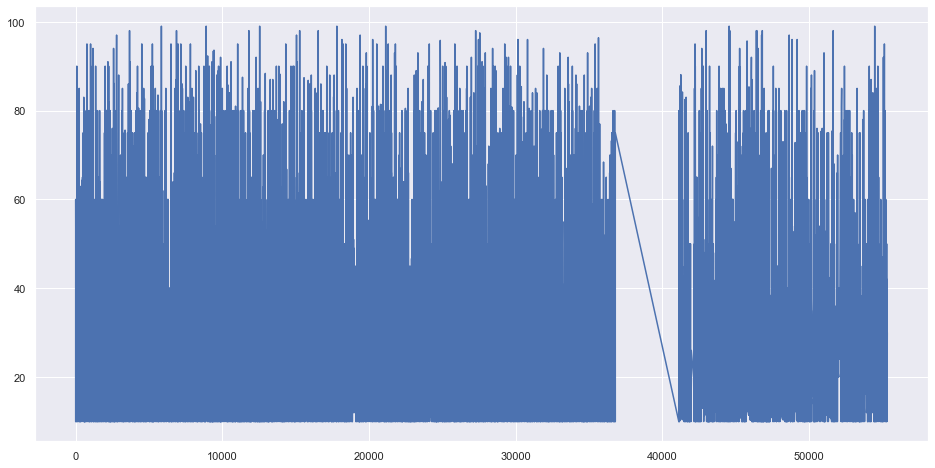

In [165]:
df[df['fire_size_class'] == 'C']['fire_size']

In [148]:
df['fire_size_class'].value_counts()

B    36517
C    10810
G     3972
F     1967
D     1394
E      700
Name: fire_size_class, dtype: int64

In [175]:
X, y = df[['latitude', 'longitude', 'disc_month_num'] + state_columns + vegetation_columns + weather_columns], df['fire_size']

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [109]:
x = []
for i in range(len(y_test)):
    x.append(i)

In [110]:
x = []
for i in range(len(y_test)):
    x.append(i)
# Create a linear regression model
reg = LinearRegression(normalize=True)
# Train a linear regression model
reg.fit(X_train, y_train)
# Forecast on a test sample
y_pred = reg.predict(X_test)
params = np.append(reg.intercept_,reg.coef_)

/Users/ipavelyev/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Users/ipavelyev/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/ipavelyev/anaconda3/lib/python3.8/site-packages/sklearn/utils/validat

In [53]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('Mean absolute error = ', mae)
print('Mean squared error = ', mse)

Mean absolute error =  3463.9843899697985
Mean squared error =  145534181.55334076


In [112]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)
print('Mean absolute percentage error = ', mape)

Mean absolute percentage error =  63894.42517347045


In [113]:
# Lasso regularization
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train, y_train)
print(clf.coef_)

/Users/ipavelyev/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


[ 5.98132681e+01  8.97459046e+01 -1.50279653e+01  3.82832724e+04
 -5.25042636e+02  6.27697442e+00  3.62750194e+03  4.78805864e+03
  4.02663428e+03 -2.59421674e+03 -0.00000000e+00  3.92105355e+00
 -3.25210898e+02  7.08860496e+03 -1.13959526e+03  9.74506227e+03
  0.00000000e+00 -1.51517228e+03  3.65883227e+03  4.54003360e+02
  3.25041562e+02 -3.56764518e+03 -8.11123915e+02 -3.63409596e+03
 -1.88862617e+03 -5.96253352e+02  6.40360817e+02  1.05017445e+02
  4.96969041e+03 -1.08465366e+03 -6.79784914e+02  1.44320024e+03
 -3.82085515e+03 -1.35074436e+03  4.45304213e+03  1.34613471e+04
 -3.13135382e+03  0.00000000e+00  8.22271584e+02  8.39556426e+03
 -1.67711201e+03 -1.89951509e+03 -3.72806504e+03 -1.00370784e+03
 -7.06046282e+02 -4.26754033e+02  1.06953246e+03  5.04442554e+03
 -1.51805647e+02 -2.25006391e+03  5.79892285e+03 -1.74279332e+03
  1.03158944e+02  2.82514672e+03 -8.40440793e+02  1.41015002e+03
  1.89109904e+03 -0.00000000e+00 -7.70625781e+02  5.07548466e+02
 -5.55455691e+01  6.49990

/Users/ipavelyev/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.755e+11, tolerance: 1.086e+09
  model = cd_fast.enet_coordinate_descent(


In [114]:
model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X_train, y_train)
alpha_aic_ = model_aic.coef_
alpha_aic_

/Users/ipavelyev/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/Users/ipavelyev/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.wa

array([ 0.00000000e+00, -4.72740417e+01,  0.00000000e+00,  3.01570180e+04,
       -3.69652828e+02, -5.13708326e+02,  5.55388622e+01,  0.00000000e+00,
        5.85597099e+02,  0.00000000e+00,  0.00000000e+00,  1.98135799e+02,
        0.00000000e+00, -2.07257240e+03,  0.00000000e+00,  6.90175152e+03,
        0.00000000e+00,  0.00000000e+00,  1.30842142e+03,  0.00000000e+00,
       -2.25474121e+02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -1.43959189e+02, -1.46257406e+02,
        2.65910872e+03,  0.00000000e+00, -5.95102886e+02,  9.25150417e+01,
        0.00000000e+00,  0.00000000e+00,  1.62548904e+03,  9.21162095e+03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  4.68577181e+03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -8.53573903e+02,  0.00000000e+00, -2.18421962e+02,  1.08354621e+03,
        0.00000000e+00,  0.00000000e+00,  2.11338477e+03, -3.57486529e+02,
        0.00000000e+00,  

In [115]:
y_pred_lasso = clf.predict(X_test)
y_pred_lasso_aic = model_aic.predict(X_test)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso_aic = mean_absolute_error(y_test, y_pred_lasso_aic)
print('Mean absolute error with lasso = ', mae_lasso)
print('Mean squared error with lasso = ', mse_lasso)
print('Mean absolute error with aic lasso = ', mae_lasso_aic)


Mean absolute error with lasso =  2992.5449843371234
Mean squared error with lasso =  135028234.01028338
Mean absolute error with aic lasso =  2947.9205546226294


/Users/ipavelyev/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/ipavelyev/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


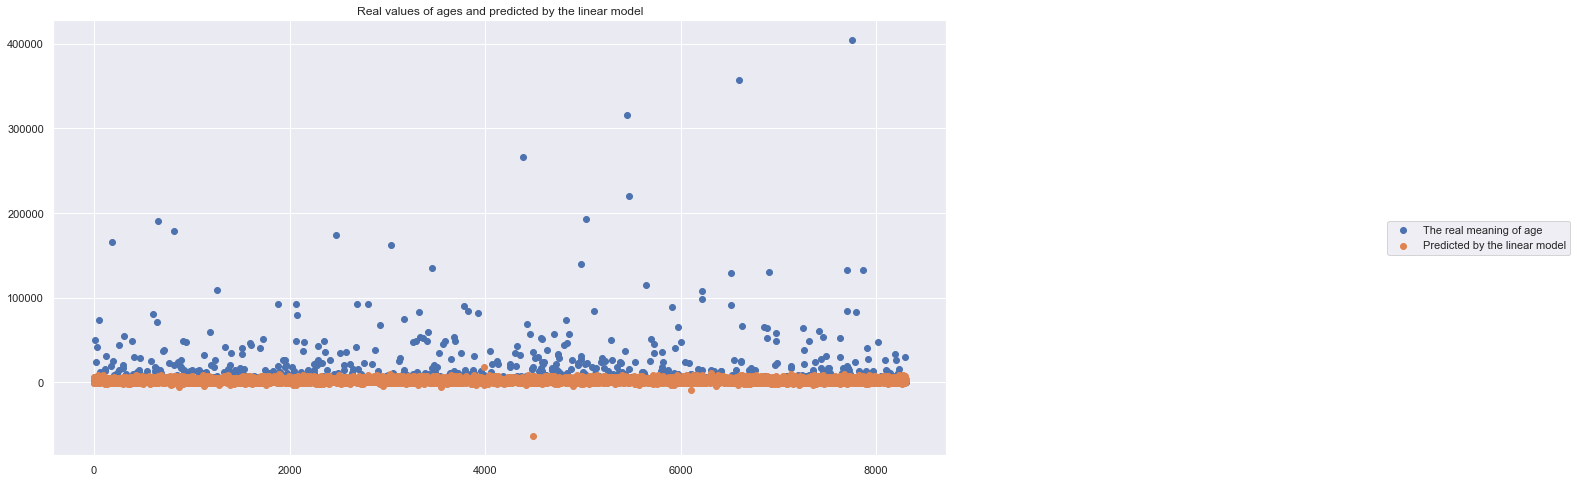

In [59]:
#graph of real and predicted values
plt.scatter(x, y_test, label = u'The real meaning of age')
plt.scatter(x, y_pred, label = u'Predicted by the linear model')
plt.title(u'Real values of ages and predicted by the linear model')
plt.legend(loc="center right",borderaxespad=0.1, bbox_to_anchor=(1.7, 0.5))

In [177]:
rfr_model = RandomForestRegressor()
rfr_model.fit(X, y)

/Users/ipavelyev/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
y_test_pred = rfr_model.predict(X_test)
y_train_pred = rfr_model.predict(X_train)

/Users/ipavelyev/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/ipavelyev/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [185]:
from sklearn.preprocessing import LabelEncoder 

In [193]:
enc.classes_

array(['Arson', 'Campfire', 'Children', 'Debris Burning', 'Equipment Use',
       'Fireworks', 'Lightning', 'Miscellaneous', 'Missing/Undefined',
       'Powerline', 'Railroad', 'Smoking', 'Structure'], dtype=object)

In [186]:
enc = LabelEncoder()

In [188]:
df['stat_cause_descr_num'] = enc.fit_transform(df['stat_cause_descr'])

In [ ]:
df['stat_cause_descr_num']

In [197]:
list(zip(enc.inverse_transform(range(0, 13)), list(range(0, 13))))

[('Arson', 0),
 ('Campfire', 1),
 ('Children', 2),
 ('Debris Burning', 3),
 ('Equipment Use', 4),
 ('Fireworks', 5),
 ('Lightning', 6),
 ('Miscellaneous', 7),
 ('Missing/Undefined', 8),
 ('Powerline', 9),
 ('Railroad', 10),
 ('Smoking', 11),
 ('Structure', 12)]

In [198]:
df['stat_cause_descr'].value_counts()

Debris Burning       14278
Arson                 9721
Miscellaneous         8344
Lightning             8218
Missing/Undefined     5060
Equipment Use         4107
Campfire              1366
Children              1280
Smoking               1181
Railroad              1021
Powerline              483
Fireworks              223
Structure               78
Name: stat_cause_descr, dtype: int64

/Users/ipavelyev/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


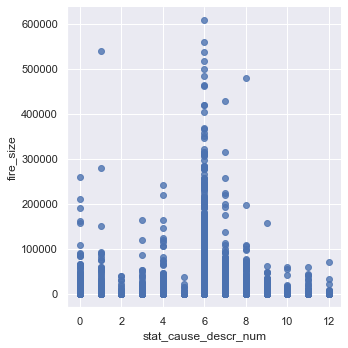

In [189]:
sns.lmplot("stat_cause_descr_num", "fire_size", df, fit_reg=False)

In [181]:
df['stat_cause_descr'].value_counts()

Debris Burning       14278
Arson                 9721
Miscellaneous         8344
Lightning             8218
Missing/Undefined     5060
Equipment Use         4107
Campfire              1366
Children              1280
Smoking               1181
Railroad              1021
Powerline              483
Fireworks              223
Structure               78
Name: stat_cause_descr, dtype: int64

In [180]:
df['stat_cause_descr'].value_counts()

array(['Missing/Undefined', 'Arson', 'Debris Burning', 'Campfire',
       'Miscellaneous', 'Fireworks', 'Lightning', 'Equipment Use',
       'Children', 'Smoking', 'Railroad', 'Structure', 'Powerline'],
      dtype=object)

In [157]:
# 7. Quality analysis.

In [172]:
df[df.index.isin(X_test.index)]['fire_size_class'].unique()

array(['B'], dtype=object)

In [158]:
mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
mape = mean_absolute_percentage_error(y_train, y_train_pred)
print('Mean absolute error = ', mae)
print('Mean squared error = ', mse)
print('Mean absolute percentage error = ', mape * 100)

Mean absolute error =  0.5938290076839234
Mean squared error =  0.5880828782824232
Mean absolute percentage error =  34.206284943592166


In [159]:
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
mape = mean_absolute_percentage_error(y_train, y_train_pred)
print('Mean absolute error = ', mae)
print('Mean squared error = ', mse)
print('Mean absolute percentage error = ', mape * 100)

Mean absolute error =  0.5842866045342593
Mean squared error =  0.5672986508639598
Mean absolute percentage error =  34.206284943592166


In [144]:
df.head()

,fire_name,fire_size,fire_size_class,stat_cause_descr,latitude,longitude,state,disc_clean_date,cont_clean_date,discovery_month,disc_date_final,cont_date_final,putout_time,disc_date_pre,disc_pre_year,disc_pre_month,wstation_usaf,dstation_m,wstation_wban,wstation_byear,wstation_eyear,Vegetation,fire_mag,weather_file,Temp_pre_30,Temp_pre_15,Temp_pre_7,Temp_cont,Wind_pre_30,Wind_pre_15,Wind_pre_7,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness,disc_month_num,putout_days,AK,AL,AR,AZ,CA,CO,CT,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,PR,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,0,4,9,12,14,15,16
0,NaN,10.0,C,Missing/Undefined,18.105072,-66.753044,PR,2/11/2007,NaN,Feb,NaN,NaN,NaT,1/12/2007,2007,Jan,785140,58917.69716,11603,1945,2018,12,1.0,785140-11603-2007.gz,24.480974,24.716923,24.902597,24.527961,4.341807,3.492857,3.262092,3.250413,78.216590,76.793750,76.381579,78.724370,0.0,0.0,0.0,0.0,0.017923,2,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,NaN,3.0,B,Arson,35.038330,-87.610000,TN,12/11/2006,NaN,Dec,NaN,NaN,NaT,11/11/2006,2006,Nov,723235,32665.34327,13896,1978,2020,15,0.1,723235-13896-2006.gz,7.553433,7.010000,0.343529,10.448298,2.709764,2.881707,1.976471,2.122320,70.840000,65.858911,55.505882,81.682678,59.8,8.4,0.0,86.8,0.184355,12,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,NaN,60.0,C,Arson,34.947800,-88.722500,MS,2/29/2004,NaN,Feb,NaN,NaN,NaT,1/30/2004,2004,Jan,723235,105122.14950,13896,1978,2020,16,1.0,723235-13896-2004.gz,4.971930,5.782766,5.558750,13.696600,3.364499,2.923830,2.695833,3.369050,75.531629,75.868613,76.812834,65.063800,168.8,42.2,18.1,124.5,0.194544,2,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,WNA 1,1.0,B,Debris Burning,39.641400,-119.308300,NV,6/6/2005,6/6/2005,Jun,6/6/2005 2:14,6/6/2005 18:00,0 days,5/7/2005,2005,May,724880,43433.32978,23185,1942,2020,0,0.1,724880-23185-2005.gz,16.275967,18.996181,18.142564,0.000000,4.054982,3.398329,3.671282,0.000000,44.778429,37.140811,35.353846,0.000000,10.4,7.2,0.0,0.0,0.487447,6,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,NaN,5.2,B,Debris Burning,31.316978,-83.393649,GA,1/10/2009,NaN,Jan,NaN,NaN,NaT,12/11/2008,2008,Dec,747810,42972.94028,99999,2006,2020,12,0.1,747810-13857-2008.gz,14.877341,16.409326,0.000000,0.000000,2.000214,1.727202,0.000000,0.000000,79.896679,73.431818,0.000000,0.000000,26.0,0.0,0.0,0.0,0.148904,1,NaN,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [146]:
df.groupby(['disc_pre_year', 'disc_pre_month']).size()

disc_pre_year  disc_pre_month
1991           Dec               106
1992           Apr               213
               Aug                85
               Dec                31
               Feb               278
                                ... 
2015           Mar               279
               May               298
               Nov                22
               Oct                85
               Sep               179
Length: 289, dtype: int64

In [147]:
df.head()

,fire_name,fire_size,fire_size_class,stat_cause_descr,latitude,longitude,state,disc_clean_date,cont_clean_date,discovery_month,disc_date_final,cont_date_final,putout_time,disc_date_pre,disc_pre_year,disc_pre_month,wstation_usaf,dstation_m,wstation_wban,wstation_byear,wstation_eyear,Vegetation,fire_mag,weather_file,Temp_pre_30,Temp_pre_15,Temp_pre_7,Temp_cont,Wind_pre_30,Wind_pre_15,Wind_pre_7,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness,disc_month_num,putout_days,AK,AL,AR,AZ,CA,CO,CT,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,PR,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,0,4,9,12,14,15,16
0,NaN,10.0,C,Missing/Undefined,18.105072,-66.753044,PR,2/11/2007,NaN,Feb,NaN,NaN,NaT,1/12/2007,2007,Jan,785140,58917.69716,11603,1945,2018,12,1.0,785140-11603-2007.gz,24.480974,24.716923,24.902597,24.527961,4.341807,3.492857,3.262092,3.250413,78.216590,76.793750,76.381579,78.724370,0.0,0.0,0.0,0.0,0.017923,2,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,NaN,3.0,B,Arson,35.038330,-87.610000,TN,12/11/2006,NaN,Dec,NaN,NaN,NaT,11/11/2006,2006,Nov,723235,32665.34327,13896,1978,2020,15,0.1,723235-13896-2006.gz,7.553433,7.010000,0.343529,10.448298,2.709764,2.881707,1.976471,2.122320,70.840000,65.858911,55.505882,81.682678,59.8,8.4,0.0,86.8,0.184355,12,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,NaN,60.0,C,Arson,34.947800,-88.722500,MS,2/29/2004,NaN,Feb,NaN,NaN,NaT,1/30/2004,2004,Jan,723235,105122.14950,13896,1978,2020,16,1.0,723235-13896-2004.gz,4.971930,5.782766,5.558750,13.696600,3.364499,2.923830,2.695833,3.369050,75.531629,75.868613,76.812834,65.063800,168.8,42.2,18.1,124.5,0.194544,2,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,WNA 1,1.0,B,Debris Burning,39.641400,-119.308300,NV,6/6/2005,6/6/2005,Jun,6/6/2005 2:14,6/6/2005 18:00,0 days,5/7/2005,2005,May,724880,43433.32978,23185,1942,2020,0,0.1,724880-23185-2005.gz,16.275967,18.996181,18.142564,0.000000,4.054982,3.398329,3.671282,0.000000,44.778429,37.140811,35.353846,0.000000,10.4,7.2,0.0,0.0,0.487447,6,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,NaN,5.2,B,Debris Burning,31.316978,-83.393649,GA,1/10/2009,NaN,Jan,NaN,NaN,NaT,12/11/2008,2008,Dec,747810,42972.94028,99999,2006,2020,12,0.1,747810-13857-2008.gz,14.877341,16.409326,0.000000,0.000000,2.000214,1.727202,0.000000,0.000000,79.896679,73.431818,0.000000,0.000000,26.0,0.0,0.0,0.0,0.148904,1,NaN,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
